# <font color=orange>**OpenCV ile Nesne Tespiti**</font>

## <font color=gold>**Şablon Eşleme**</font> <font color=gray>**(Template Matching)**</font>

***Sablon Eslestirme,*** bir sablon goruntunun konumunu daha buyuk bir goruntude aramak ve bulmak icin bir yontemdir.

Sablon goruntusunu giris goruntusunun uzerine kaydirir ve sablon goruntusunun altindaki giris goruntusunun sablonu ve yamayi karsilastirir.

In [1]:
import cv2
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread('cat.jpg',0)
print('Buyuk resim boyutlari:',img.shape)

template = cv2.imread('cat_face.jpg',0)
print('Sablon resim boyutlari:',template.shape)

Buyuk resim boyutlari: (433, 650)
Sablon resim boyutlari: (219, 253)


(215, 398)


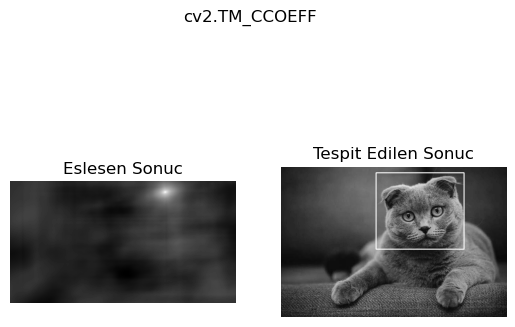

(215, 398)


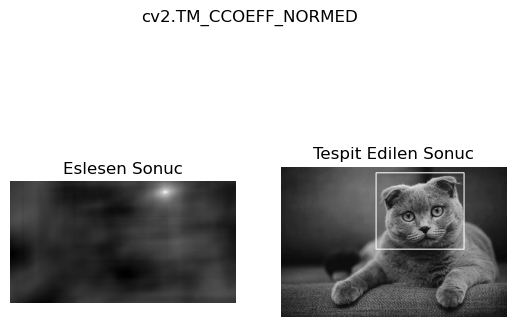

(215, 398)


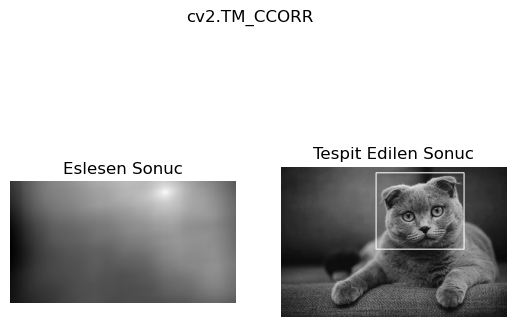

(215, 398)


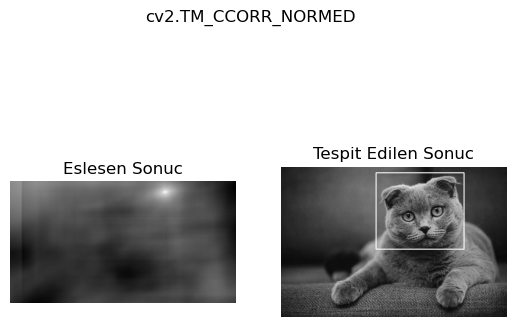

(215, 398)


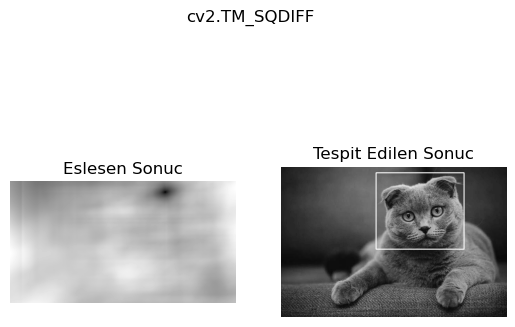

(215, 398)


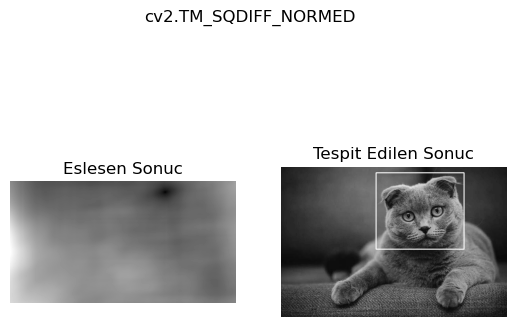

In [10]:
h, w = template.shape

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    method = eval(meth) #stringleri fonksiyonlara cevirir.
    # 'cv2.TM_CCOEFF' --> cv2.TM_CCOEFF
    res = cv2.matchTemplate(img,template,method)
    print(res.shape)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    
    plt.figure()
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Eslesen Sonuc'), plt.axis('off')
    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Tespit Edilen Sonuc'), plt.axis('off')
    plt.suptitle(meth)
    
    plt.show()
    